In [1]:
!pip install pennylane scikit-learn matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.3/934.3 kB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 78.4 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt


Data

In [3]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

def load_data(n_samples=200, test_size=0.3, noise=0.1):
    X, y = make_moons(
        n_samples=n_samples,
        noise=noise,
        random_state=42
    )
    y = 2 * y - 1   # {0,1} -> {-1, +1}
    return train_test_split(X, y, test_size=test_size, random_state=42)


Model

In [24]:
n_qubits = 3
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def quantum_circuit(x, weights):
    for i in range(n_qubits):
        qml.RX(x[0], wires=i)
        qml.RY(x[1], wires=i)
        qml.RY(weights[i], wires=i)

    for i in range(n_qubits - 1):
        qml.CNOT(wires=[i, i + 1])

    # Measure Z^{\otimes n}
    return qml.expval(
        qml.PauliZ(0) @ qml.PauliZ(1) @ qml.PauliZ(2)
    )



Train

In [25]:
import pennylane as qml
import numpy as np

def mse_loss(weights, X, y):
    """
    Mean Squared Error (MSE) loss for the PQC classifier.
    """
    loss = 0.0
    for xi, yi in zip(X, y):
        pred = quantum_circuit(xi, weights)
        loss += (pred - yi) ** 2
    return loss / len(X)

def train_model(X_train, y_train, epochs=30, lr=0.02):
    """
    Train the parameterized quantum circuit using a hybrid
    quantum–classical optimization loop.
    """
    weights = np.random.randn(n_qubits)
    opt = qml.AdamOptimizer(lr)

    losses = []
    for epoch in range(epochs):
        weights, loss = opt.step_and_cost(
            lambda w: mse_loss(w, X_train, y_train),
            weights
        )
        losses.append(loss)

        print(
            f"[Training] Epoch {epoch:02d} | "
            f"MSE loss on training set = {loss:.4f}"
        )

    return weights, losses





Visualize

In [26]:
import matplotlib.pyplot as plt

def plot_loss(losses):
    """
    Plot the training loss (MSE) of the PQC classifier.
    """
    plt.figure()
    plt.plot(losses, marker='o')
    plt.xlabel("Epoch")
    plt.ylabel("Loss (MSE)")
    plt.title("Training loss (MSE) of the PQC classifier")
    plt.grid(True)
    plt.show()



Big/small

In [27]:
dev_big = qml.device("default.qubit", wires=6)
dev_small = qml.device("default.qubit", wires=3)

@qml.qnode(dev_big)
def big_circuit(x, weights):
    for i in range(6):
        qml.RX(x[0], wires=i)
        qml.RY(x[1], wires=i)
        qml.RY(weights[i], wires=i)

    for i in range(5):
        qml.CNOT(wires=[i, i + 1])

    # Measure Z^{\otimes 6}
    return qml.expval(
        qml.PauliZ(0)
        @ qml.PauliZ(1)
        @ qml.PauliZ(2)
        @ qml.PauliZ(3)
        @ qml.PauliZ(4)
        @ qml.PauliZ(5)
    )

@qml.qnode(dev_small)
def small_circuit(x, weights):
    for i in range(3):
        qml.RX(x[0], wires=i)
        qml.RY(x[1], wires=i)
        qml.RY(weights[i], wires=i)

    for i in range(2):
        qml.CNOT(wires=[i, i + 1])

    # Measure Z^{\otimes 3}
    return qml.expval(
        qml.PauliZ(0) @ qml.PauliZ(1) @ qml.PauliZ(2)
    )


In [ ]:
Main


----------------------------------------
Run 1/5 with random seed = 0
----------------------------------------
[Training] Epoch 00 | MSE loss on training set = 1.1048
[Training] Epoch 01 | MSE loss on training set = 1.1048
[Training] Epoch 02 | MSE loss on training set = 1.1048
[Training] Epoch 03 | MSE loss on training set = 1.1048
[Training] Epoch 04 | MSE loss on training set = 1.1048
[Training] Epoch 05 | MSE loss on training set = 1.1048
[Training] Epoch 06 | MSE loss on training set = 1.1048
[Training] Epoch 07 | MSE loss on training set = 1.1048
[Training] Epoch 08 | MSE loss on training set = 1.1048
[Training] Epoch 09 | MSE loss on training set = 1.1048
[Training] Epoch 10 | MSE loss on training set = 1.1048
[Training] Epoch 11 | MSE loss on training set = 1.1048
[Training] Epoch 12 | MSE loss on training set = 1.1048
[Training] Epoch 13 | MSE loss on training set = 1.1048
[Training] Epoch 14 | MSE loss on training set = 1.1048
[Training] Epoch 15 | MSE loss on training set =

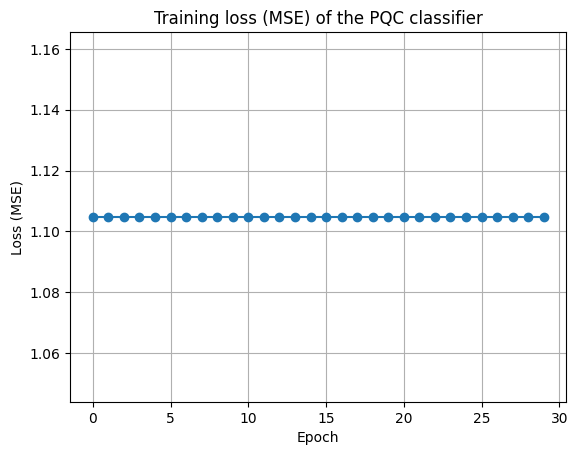

[Evaluation] Test accuracy: 0.333

----------------------------------------
Run 2/5 with random seed = 1
----------------------------------------
[Training] Epoch 00 | MSE loss on training set = 0.7659
[Training] Epoch 01 | MSE loss on training set = 0.7659
[Training] Epoch 02 | MSE loss on training set = 0.7659
[Training] Epoch 03 | MSE loss on training set = 0.7659
[Training] Epoch 04 | MSE loss on training set = 0.7659
[Training] Epoch 05 | MSE loss on training set = 0.7659
[Training] Epoch 06 | MSE loss on training set = 0.7659
[Training] Epoch 07 | MSE loss on training set = 0.7659
[Training] Epoch 08 | MSE loss on training set = 0.7659
[Training] Epoch 09 | MSE loss on training set = 0.7659
[Training] Epoch 10 | MSE loss on training set = 0.7659
[Training] Epoch 11 | MSE loss on training set = 0.7659
[Training] Epoch 12 | MSE loss on training set = 0.7659
[Training] Epoch 13 | MSE loss on training set = 0.7659
[Training] Epoch 14 | MSE loss on training set = 0.7659
[Training] Epo

In [28]:
import numpy as np

# -----------------------------
# Load data
# -----------------------------
X_train, X_test, y_train, y_test = load_data()

# -----------------------------
# Repeated runs with different seeds
# -----------------------------
seeds = [0, 1, 2, 3, 4]
accuracies = []

for i, seed in enumerate(seeds):
    print("\n" + "-" * 40)
    print(f"Run {i+1}/{len(seeds)} with random seed = {seed}")
    print("-" * 40)

    np.random.seed(seed)

    # Train PQC classifier
    weights, losses = train_model(X_train, y_train)

    # Plot loss only once
    if i == 0:
        plot_loss(losses)

    # Evaluate on test set
    correct = 0
    for x, y in zip(X_test, y_test):
        pred = quantum_circuit(x, weights)
        if np.sign(pred) == y:
            correct += 1

    acc = correct / len(y_test)
    accuracies.append(acc)

    print(f"[Evaluation] Test accuracy: {acc:.3f}")

# -----------------------------
# Cross-validation summary
# -----------------------------
mean_acc = np.mean(accuracies)
std_acc = np.std(accuracies)

print("\n" + "=" * 50)
print("Cross-validation results for PQC classifier")
print("=" * 50)
print(f"Average test accuracy: {mean_acc:.3f}")
print(f"Standard deviation:   {std_acc:.3f}")

# -----------------------------
# Big → Small approximation
# -----------------------------
np.random.seed(0)
big_weights = np.random.randn(6)

M = 4
small_weights_list = [np.random.randn(3) for _ in range(M)]

errors = []

for x in X_test:
    f_big = big_circuit(x, big_weights)
    f_small_hat = np.mean(
        [small_circuit(x, w) for w in small_weights_list]
    )
    errors.append((f_big - f_small_hat) ** 2)

print("\n" + "=" * 50)
print("Approximation of a large circuit using small circuits")
print("=" * 50)
print(f"Number of small circuits (M): {M}")
print(f"MSE (big → small): {np.mean(errors):.4f}")





In [29]:
print("\n" + "=" * 70)
print("Experiment: Effect of M under different aggregation strategies")
print("Seed fixed to 0 (fully aligned with Big→Small baseline)")
print("=" * 70)

M_values = [1, 2, 4, 8, 16]

for M in M_values:
    np.random.seed(0)   #

    big_weights = np.random.randn(6)
    small_weights_list = [np.random.randn(3) for _ in range(M)]

    w = np.random.rand(M)
    w = w / np.sum(w)

    errors_mean = []
    errors_weighted = []

    for x in X_test:
        f_big = big_circuit(x, big_weights)
        f_smalls = np.array([small_circuit(x, w_i) for w_i in small_weights_list])

        f_mean = np.mean(f_smalls)
        f_weighted = np.dot(w, f_smalls)

        errors_mean.append((f_big - f_mean) ** 2)
        errors_weighted.append((f_big - f_weighted) ** 2)

    print(
        f"M = {M:2d} | "
        f"Mean MSE = {np.mean(errors_mean):.4f} | "
        f"Weighted Mean MSE = {np.mean(errors_weighted):.4f}"
    )




Experiment: Effect of M under different aggregation strategies
Seed fixed to 0 (fully aligned with Big→Small baseline)
M =  1 | Mean MSE = 0.1307 | Weighted Mean MSE = 0.1307
M =  2 | Mean MSE = 0.0718 | Weighted Mean MSE = 0.0607
M =  4 | Mean MSE = 0.1393 | Weighted Mean MSE = 0.1629
M =  8 | Mean MSE = 0.0476 | Weighted Mean MSE = 0.0297
M = 16 | Mean MSE = 0.0796 | Weighted Mean MSE = 0.0492
